# fully connected layer와 CNN 성능비교를 위한 코드임

1. 모델1 : DNN + EarlyStopping
2. 모델2 : CNN

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
import os
os.environ['BACKEND'] = 'tensorflow' # pytorch, JAX도 가능

In [ ]:
import keras
keras.__version__

'3.2.1'

# CIFAR-10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 258s 2us/step


In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape #

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
labels = {0: 'Airplane',
          1: 'Automobile',
          2: 'Bird',
          3: 'Cat',
          4: 'Deer',
          5: 'Dog',
          6: 'Frog',
          7: 'Horse',
          8: 'Ship',
          9: 'Truck',
          }

labels

{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

id = 2627
다음 그림은 Horse


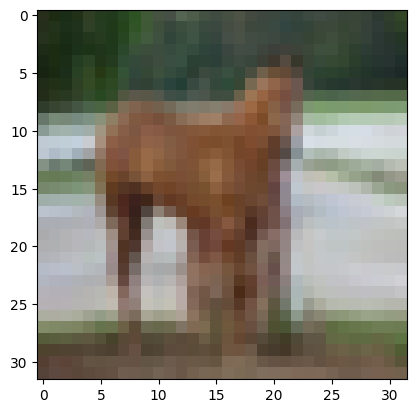

In [ ]:
# 이미지 확인, test셋
id = np.random.randint(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]}')
plt.imshow(test_x[id])
plt.show()

# Modeling I
- Sequential, Functional 둘 중 하나
- CNN은 아직 금지! Conv2D X, Maxpool2D X
- .fit( ), .predict( ) 까지 자유롭게 모델링 해보세요!


In [ ]:
import keras

from keras.utils import clear_session
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten

In [ ]:
# 1. 메모리 청소
clear_session()

# 2. 모델 선언 : 리스트 방식
model1 = Sequential([Input(shape=(32,32,3)),
                     keras.layers.Rescaling(1/255),
                     Flatten(),
                     Dense(64, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(256, activation='relu'),
                     Dense(256, activation='relu'),
                     Dense(10, activation='softmax'),
                     ])

# 3. 레이어 블록 조립 : .add() 방식
# model1.add( Input(shape=(32,32,3)) )
# model1.add( keras.layers.Rescaling(1/255) )
# model1.add( Flatten() )
# model1.add( Dense(64, activation='relu'))
# model1.add( Dense(64, activation='relu'))
# model1.add( Dense(128, activation='relu') )
# model1.add( Dense(128, activation='relu') )
# model1.add( Dense(256, activation='relu') )
# model1.add( Dense(256, activation='relu') )
# model1.add( Dense(10, activation='softmax') )

# 4. 컴파일
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 327,050 (1.25 MB)

 Trainable params: 327,050 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               # 임계값
                   patience=5,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

In [ ]:
model1.fit(train_x, train_y, validation_split=0.2,
           epochs=10000, verbose=1,
           callbacks=[es]
           )

Epoch 1/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1849 - loss: 2.1102 - val_accuracy: 0.2741 - val_loss: 1.9311
Epoch 2/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2748 - loss: 1.9115 - val_accuracy: 0.2850 - val_loss: 1.8737
Epoch 3/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2924 - loss: 1.8613 - val_accuracy: 0.3196 - val_loss: 1.8150
Epoch 4/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3272 - loss: 1.7928 - val_accuracy: 0.3240 - val_loss: 1.8031
Epoch 5/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3431 - loss: 1.7607 - val_accuracy: 0.3488 - val_loss: 1.7659
Epoch 6/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3634 - loss: 1.7206 - val_accuracy: 0.3634 - val_loss: 1.7291
Epoch 7/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3856 - loss: 1.6709 - val_accuracy: 0.3944 - val_loss: 1.6586
Epoch 8/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 

In [ ]:
y_pred=model1.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
model1.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4931 - loss: 1.4231


[1.4239851236343384, 0.4950000047683716]

# 마이코드======================

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten # Input = input_shape
from keras.backend import clear_session
# from keras.utils import clear_session

from keras.optimizers import Adam

In [ ]:
train_x.shape

(50000, 32, 32, 3)

In [ ]:
test_x.shape

(10000, 32, 32, 3)

In [ ]:
train_x = train_x.reshape(50000, 32, 32, 3)
test_x= test_x.reshape(10000, 32, 32, 3)

In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

# scaler = MinMaxScaler()
# train_x = scaler.fit_transform(train_x)
# test_x = scaler.transform(test_x)

In [ ]:
train_x.shape

(50000, 32, 32, 3)

In [ ]:
train_y.shape

(50000, 1)

In [ ]:
from tensorflow.keras.layers import Dense
clear_session()
model = Sequential(Dense(10, input_shape=(32, 32, 3), activation='softmax'))
model.summary()

TypeError: 'Dense' object is not iterable

In [ ]:
model.complie(optimizer=Adam(learning_rate=0.1), loss='sparse_categoricarl_crossentropy')

In [ ]:
hist=model.fit(train_x, train_y, epochs=10, validation_split=.2).history

# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()
dl_history_plot(history)

In [ ]:
pred=model.predict(test_x)
pred=pred.argmax(axis=1)
pred

In [ ]:
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))
print(accuracy_score(test_y, pred))

# Modeling II
- Sequential, Functional 둘 중 하나
- CNN 구조로 진행하세요!
- .fit( ), .predict( ) 까지 자유롭게 모델링 해보세요!

In [ ]:
import keras

from keras.utils import clear_session
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPool2D

In [ ]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
# 1. 메모리 청소
clear_session()

# 2. 모델 선언 : 리스트 안에 넣는 방식
model2 = Sequential([Input(shape=(32,32,3)),
                     keras.layers.Rescaling(1/255),


                     Conv2D(filters=64,        # 서로 다른 필터 64개를 사용하겠다.
                            kernel_size=(3,3), # Conv2D 필터의 가로 세로 사이즈
                            strides=(1,1),     # Conv2D 필터의 이동 보폭
                            padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                            activation='relu', # 주의!
                            ),
                     Conv2D(filters=64,        # 서로 다른 필터 64개를 사용하겠다.
                            kernel_size=(3,3), # Conv2D 필터의 가로 세로 사이즈
                            strides=(1,1),     # Conv2D 필터의 이동 보폭
                            padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                            activation='relu', # 주의!
                            ),
                     MaxPool2D(pool_size=(2,2),# pooling 필터의 가로 세로 사이즈
                               strides=(2,2)   # pooling 필터의 이동 보폭 (기본적으로 pool_size를 따름)
                               ),


                     Conv2D(filters=128,        # 서로 다른 필터 64개를 사용하겠다.
                            kernel_size=(3,3), # Conv2D 필터의 가로 세로 사이즈
                            strides=(1,1),     # Conv2D 필터의 이동 보폭
                            padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                            activation='relu', # 주의!
                            ),
                     Conv2D(filters=128,        # 서로 다른 필터 64개를 사용하겠다.
                            kernel_size=(3,3), # Conv2D 필터의 가로 세로 사이즈
                            strides=(1,1),     # Conv2D 필터의 이동 보폭
                            padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                            activation='relu', # 주의!
                            ),
                     MaxPool2D(pool_size=(2,2),# pooling 필터의 가로 세로 사이즈
                               strides=(2,2)   # pooling 필터의 이동 보폭 (기본적으로 pool_size를 따름)
                               ),


                     Conv2D(filters=256,        # 서로 다른 필터 64개를 사용하겠다.
                            kernel_size=(3,3), # Conv2D 필터의 가로 세로 사이즈
                            strides=(1,1),     # Conv2D 필터의 이동 보폭
                            padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                            activation='relu', # 주의!
                            ),
                     Conv2D(filters=256,        # 서로 다른 필터 64개를 사용하겠다.
                            kernel_size=(3,3), # Conv2D 필터의 가로 세로 사이즈
                            strides=(1,1),     # Conv2D 필터의 이동 보폭
                            padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 더 반영
                            activation='relu', # 주의!
                            ),
                     MaxPool2D(pool_size=(2,2),# pooling 필터의 가로 세로 사이즈
                               strides=(2,2)   # pooling 필터의 이동 보폭 (기본적으로 pool_size를 따름)
                               ),


                     Flatten(),
                     Dense(10, activation='softmax')
                     ])

# 3. 컴파일
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,186,378 (4.53 MB)

 Trainable params: 1,186,378 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.fit(train_x, train_y, validation_split=0.2,
           epochs=10000, verbose=1,
           callbacks=[es],
           )

Epoch 1/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.0982 - loss: 2.3029 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 2/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 3/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 4/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0988 - loss: 2.3027 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 5/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1014 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
y_pred2 = model2.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
model2.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1006 - loss: 2.3026


[2.302614212036133, 0.10000000149011612]

# 마이코드 =========================================

In [ ]:
#

In [ ]:
model = Sequential(Dense(128, input_shape=(32, 32, 3), activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(32, activation='relu'),
                   Dense(16, activation='relu'),
                   Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.complie(optimizer=Adam(learning_rate=0.1), loss='sparse_categoricarl_crossentropy')

In [ ]:
hist=model.fit(train_x, train_y, epochs=10, validation_split=.2).history

# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()
dl_history_plot(history)

In [ ]:
pred=model.predict(test_x)
pred=pred.argmax(axis=1)
pred

In [ ]:
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))
print(accuracy_score(test_y, pred))